<a href="https://colab.research.google.com/github/muesgit/deep_learning_tutorial/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [29]:
# Create a Modell Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 Features of the flower)
  # --> Hidden Layer 1 (number of neurons)
  # --> H2(n)
  # --> Output (3 Classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate the nn.Model
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [30]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create instance of model
model = Model()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

In [32]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [33]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
# Change labels to numbers
my_df['species'] = my_df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

<ipython-input-34-7010f8ab90c7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


In [35]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [36]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [37]:
X = X.values
y = y.values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Train Test Split

In [40]:
# test size 0.2 = 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [41]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Long Tensor 64Bit Integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [42]:
# Set the criterion of model to measure the error,
# how far off the prediciton from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr= learning rate (if error doenst go down after a
# bunch of iterations (epochs), lower the rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [43]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [44]:
Model.parameters

<function torch.nn.modules.module.Module.parameters(self, recurse: bool = True) -> Iterator[torch.nn.parameter.Parameter]>

In [45]:
# Train our model!
# Epoch (one run thru all the training data in network)
epochs = 100
losses = []
for i in range(epochs):
  # go foward and get prediciton
  y_pred = model.forward(X_train)
  # Measure the loss/error
  loss = criterion(y_pred, y_train)
  # Keep track of losses
  losses.append(loss.detach().numpy())
  # print every 10 epoch
  if i % 10 == 0:
      print(f'Epoch: {i} and loss: {loss}')
  # Back Propagation: Take the error rate of forward propagationand
  # feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1642652750015259
Epoch: 10 and loss: 0.9501564502716064
Epoch: 20 and loss: 0.7863473296165466
Epoch: 30 and loss: 0.6365296840667725
Epoch: 40 and loss: 0.4307558238506317
Epoch: 50 and loss: 0.28396666049957275
Epoch: 60 and loss: 0.17216533422470093
Epoch: 70 and loss: 0.10550136864185333
Epoch: 80 and loss: 0.07423163950443268
Epoch: 90 and loss: 0.058695968240499496


Text(0.5, 0, 'Epoch')

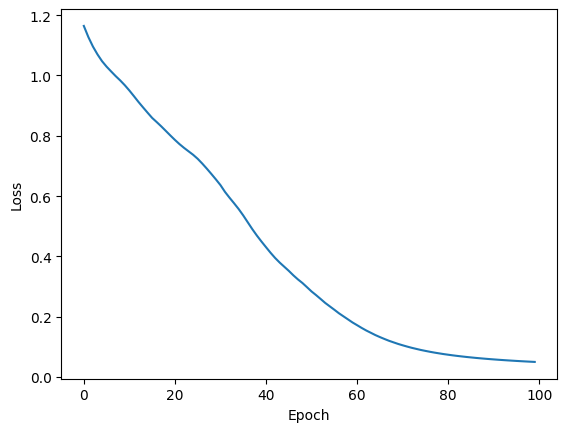

In [46]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [47]:
# Evaluate Model on Test Data Set
# turn off back propagation
with torch.no_grad():
  # X_test are feratures from test set
  y_eval = model.forward(X_test)
  # find the error
  loss = criterion(y_eval, y_test)

In [48]:
loss

tensor(0.1239)

In [50]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #  Will tell us what type our class is
    print(f'{i+1}. {str(y_val)} \t {y_test[i]}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
  print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1. tensor([-7.2063,  2.1612,  5.4769]) 	 2
2. tensor([-9.1754,  1.3635,  7.8524]) 	 2
3. tensor([-10.2001,   1.7588,   8.6470]) 	 2
4. tensor([-3.0953,  4.1606, -0.1988]) 	 1
5. tensor([-8.3845,  2.0174,  6.6467]) 	 2
6. tensor([-1.5475,  4.3179, -1.9503]) 	 1
7. tensor([-6.5539,  2.5202,  4.4807]) 	 2
8. tensor([-2.6112,  4.2436, -0.8124]) 	 1
9. tensor([-7.2923,  2.3135,  5.3310]) 	 2
10. tensor([-9.6277,  1.4424,  8.2337]) 	 2
11. tensor([-5.8210,  2.7769,  3.5191]) 	 2
12. tensor([  7.1417,   1.4121, -11.7486]) 	 0
13. tensor([  6.4062,   1.2480, -10.5262]) 	 0
14. tensor([-0.5721,  3.7056, -2.5105]) 	 1
15. tensor([  6.1274,   1.6891, -10.5167]) 	 0
16. tensor([-5.4546,  3.2498,  2.8626]) 	 2
17. tensor([  6.4498,   1.4771, -10.8144]) 	 0
18. tensor([-6.4638,  2.5415,  4.3899]) 	 1
19. tensor([  6.8152,   1.4108, -11.2762]) 	 0
20. tensor([ 5.1861,  1.5621, -8.9940]) 	 0
21. tensor([-1.0091,  4.0478, -2.2849]) 	 1
22. tensor([-9.2123,  1.6705,  7.6967]) 	 2
23. tensor([  6.3235,  

In [51]:
# Adding new Data
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [52]:
with torch.no_grad():
  print(model(new_iris))

tensor([  6.8540,   1.2635, -11.1874])


In [57]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [58]:
with torch.no_grad():
  print(model(newer_iris))


tensor([-6.5719,  2.3659,  4.5730])


In [59]:
# Save NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [60]:
# Load the savec model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<ipython-input-60-4f84e4d516df>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [61]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)